In [2]:
### import wymaganych bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from scipy import stats

plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (50,12)
pd.options.mode.chained_assignment = None





In [3]:
df = pd.read_csv('./TitanicMess.tsv', sep='\t') # załadowanie zbioru
df_backup = pd.read_csv('./TitanicMess.tsv', sep='\t') # załadowanie zbioru zapasowego
pd.set_option('display.max_rows', df.shape[0]+1)
print(df.shape)
print(df.dtypes)

(892, 13)
PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object


<AxesSubplot:>

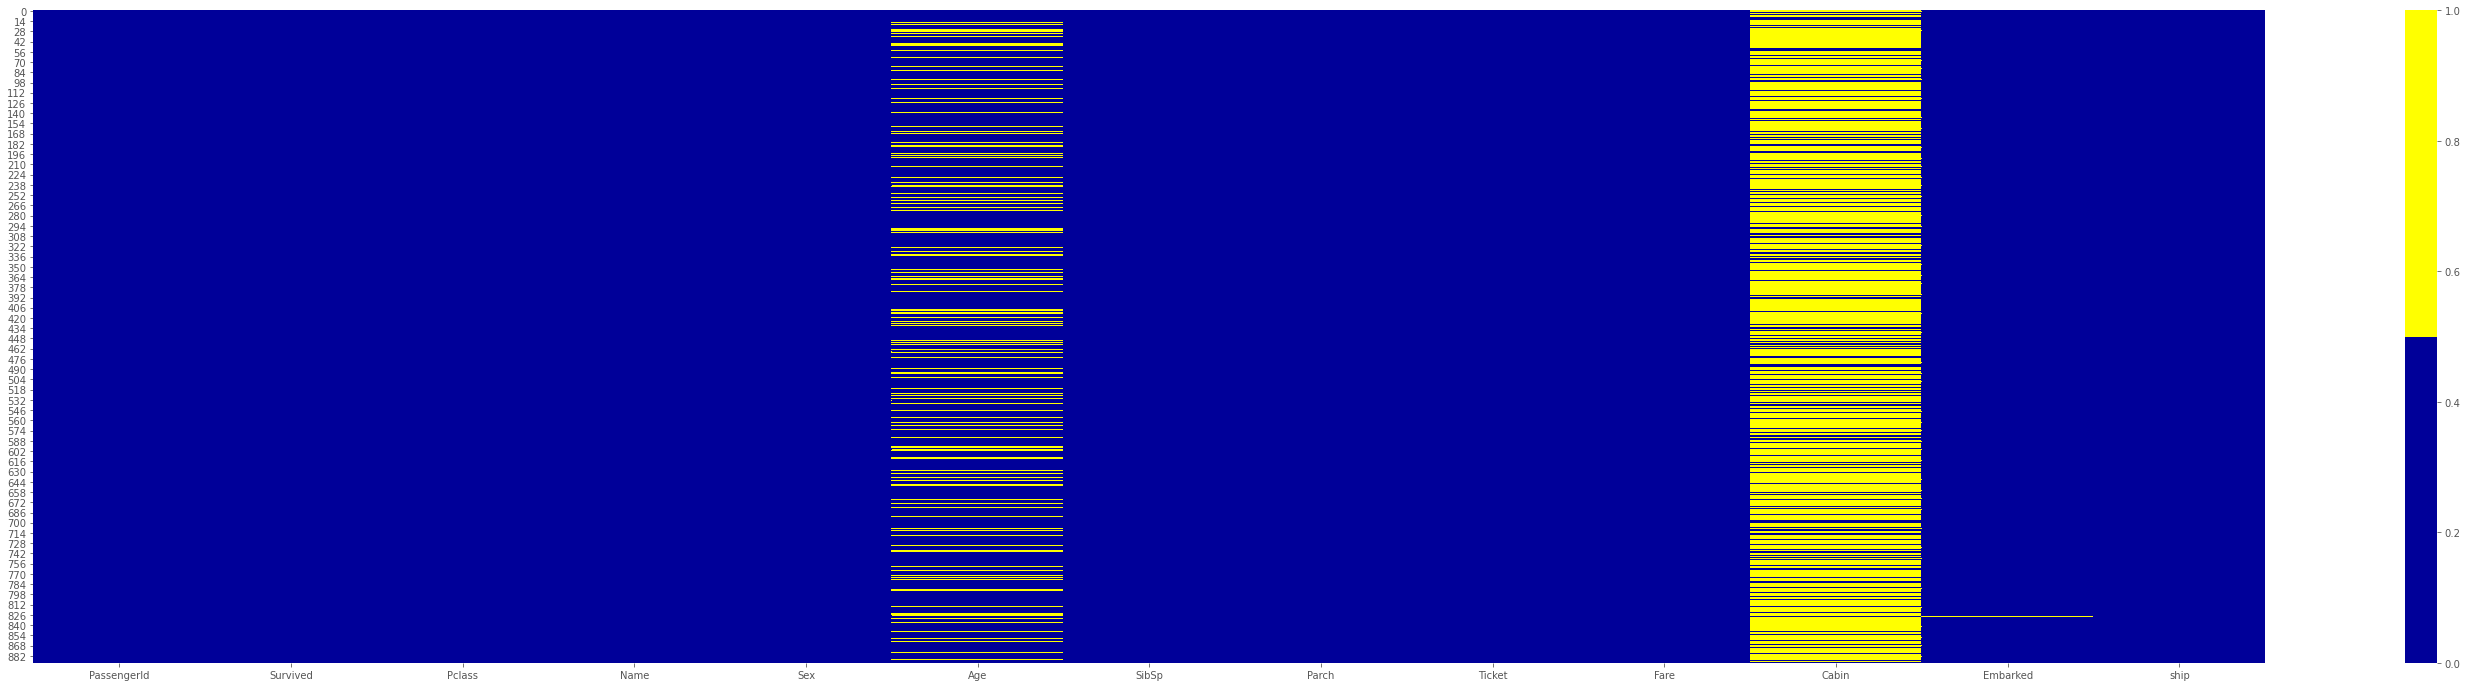

In [4]:
# w pierwszej kolejności sprawdźmy czy istnieją brakujące wartości
colours = ['#000099', '#ffff00']
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours))

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 19.394618834080717%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Cabin - 76.79372197309418%
Embarked - 0.2242152466367713%
ship - 0.0%


In [41]:
# najbardziej wybrakowane kolumny to Cabin, Age, natomiast widać kilka brakujących elementów w kolumnie Embarked

<AxesSubplot:>

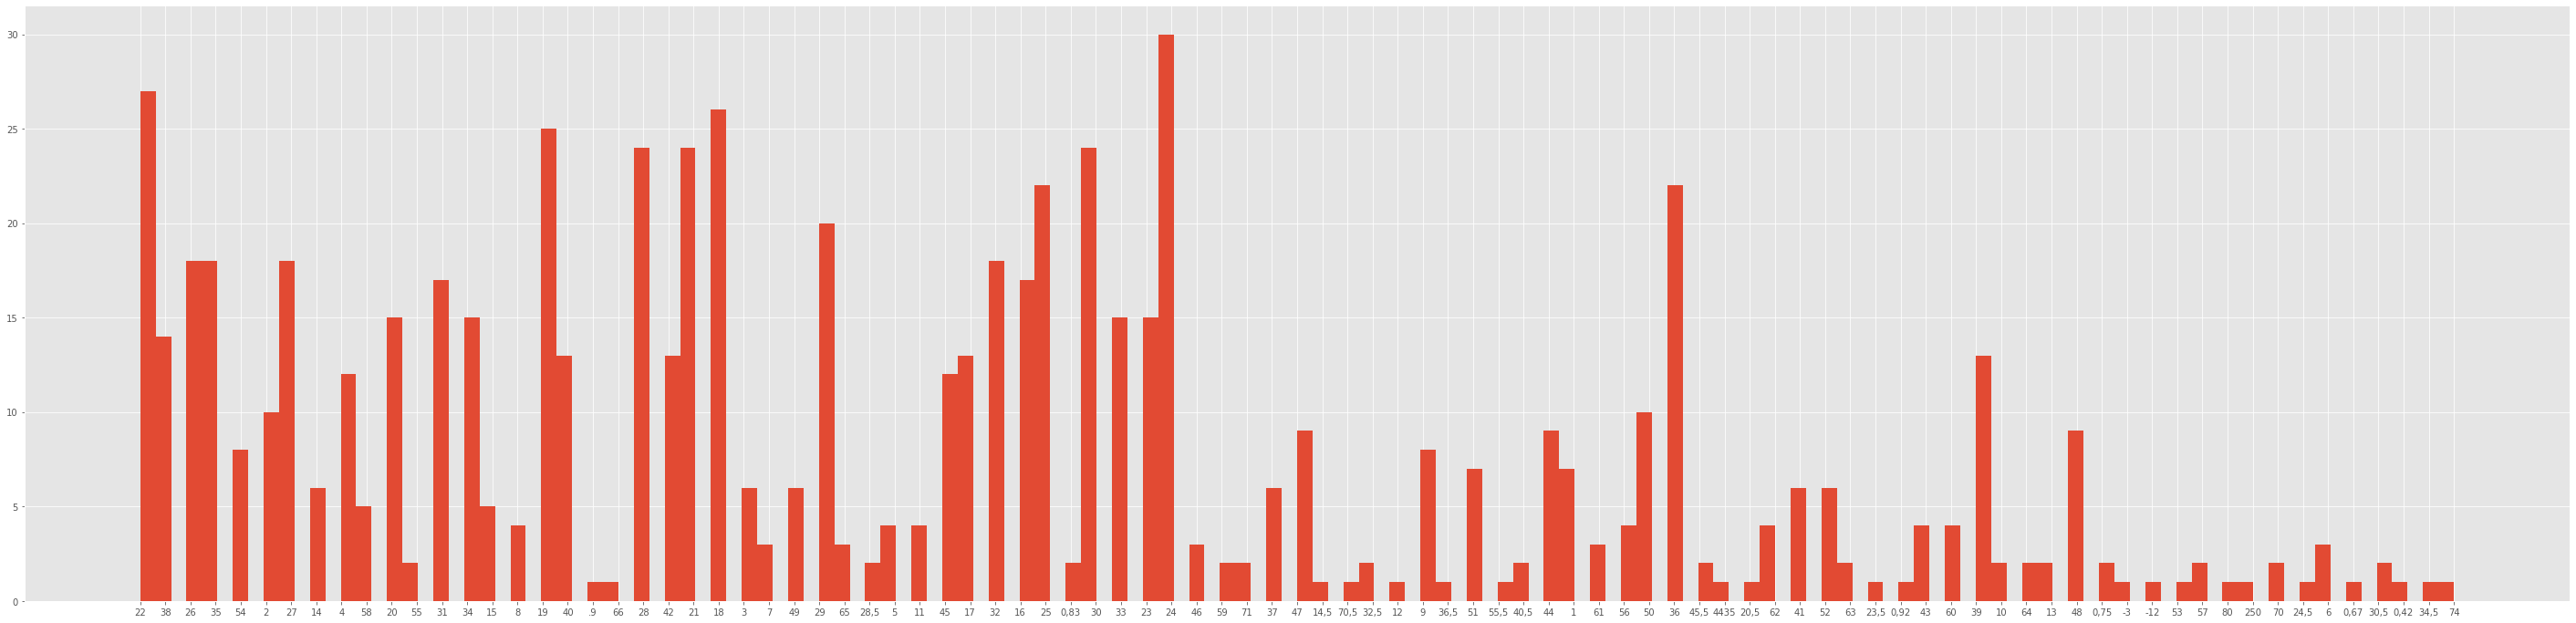

In [6]:
# przyjrzyjmy się najpierw kolumnie Age, bo logicznie powinna być ona typu numerycznego, a jest inaczej
df['Age']
df['Age'].hist(bins=150)
# problem jest widoczny, poza wartościami NaN mamy też wartości bezsensowne np. ujemny wiek

In [7]:
d = df['Age'].str.replace(',','.')
d_numeric = pd.to_numeric(d)
df['Age'] = d_numeric
# po przekształceniu do formy numerycznej otrzymaliśmy wartość ujemną i maksimum powyżej 4000, co w przypadku wieku pasażera nie ma sensu

In [8]:
med = df['Age'].median()
df['Age'] = df['Age'].fillna(med) #zastępujemy wartości NaN medianą


In [9]:
df['Age'] = df['Age'].replace([-12.00, 4435.00, -3.00, 250.00], med)

In [10]:
df['Age'].describe()

count    892.000000
mean      29.281469
std       13.098974
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

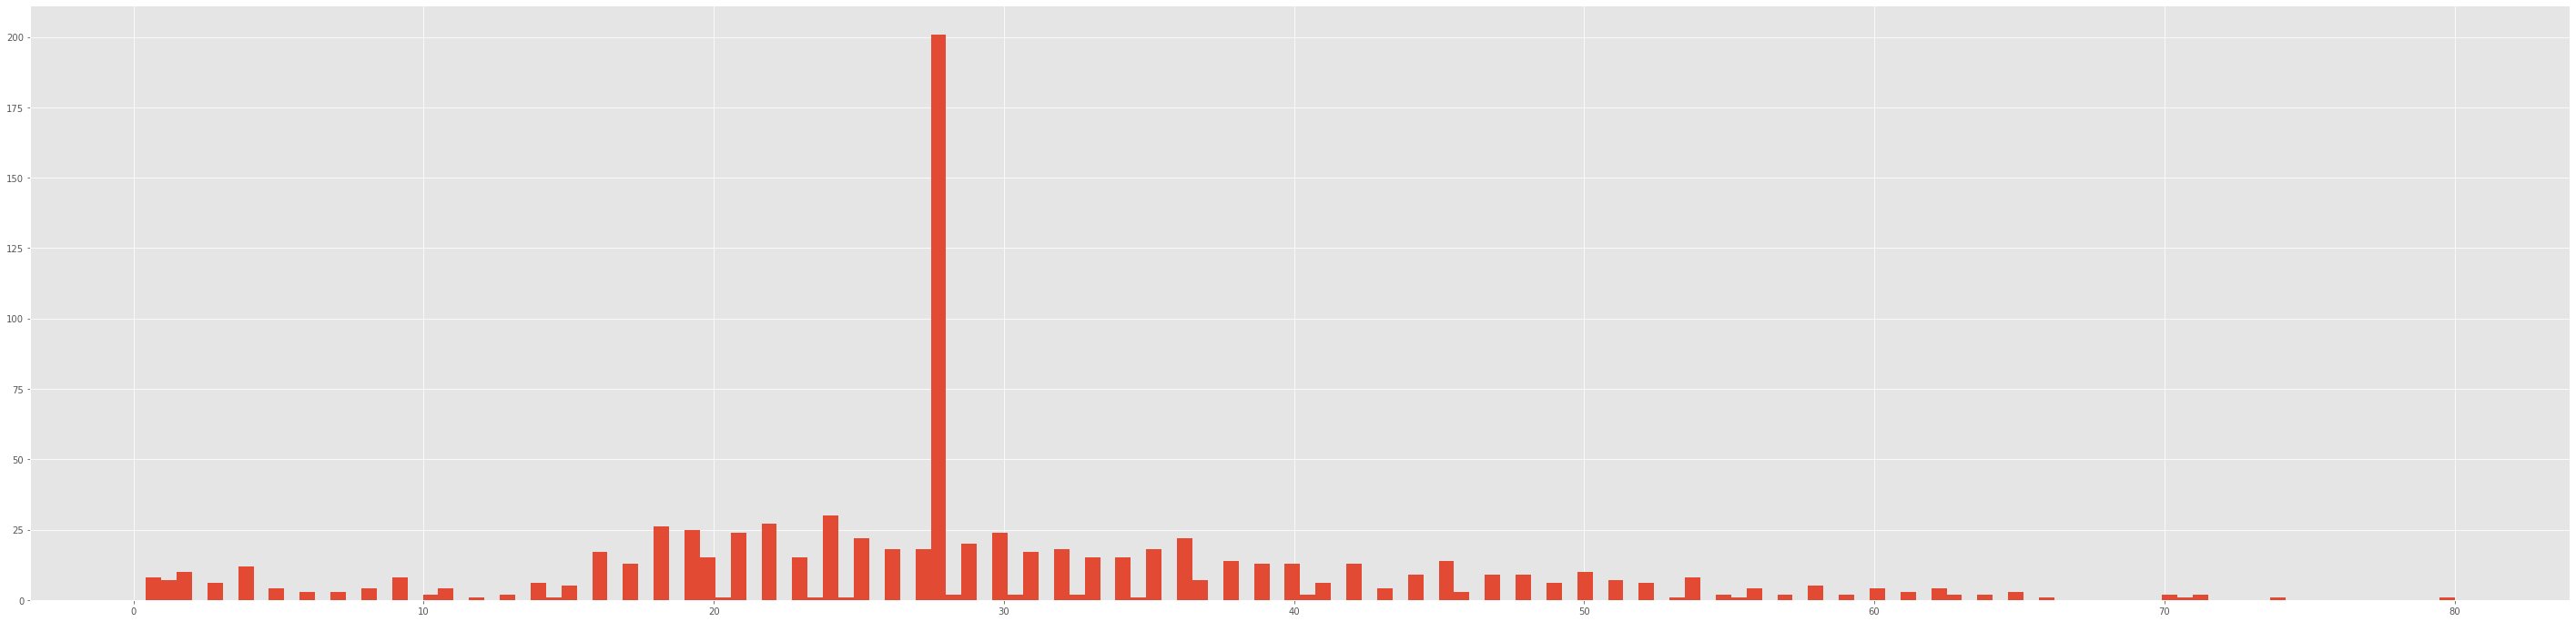

In [11]:
df['Age'].hist(bins=150) # po zastąpieniu danych brakujących medianą otrzymaliśmy bardziej rozsądny histogram, natomiast otrzymaliśmy dużo powtórzeń mediany

In [12]:
df['Survived'].describe() # kolumna ok

count    892.000000
mean       0.386771
std        0.487284
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [14]:
df['Pclass'].describe() # kolumna ok

count    892.000000
mean       2.307175
std        0.836750
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [15]:
df['SibSp'].describe() # kolumna ok

count    892.000000
mean       0.525785
std        1.102190
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [16]:
# inne kolumny numeryczne nie budzą zastrzeżeń na pierwszy rzut oka

In [17]:
df['Embarked'].value_counts(normalize=True)

S     0.722472
C     0.187640
Q     0.085393
So    0.002247
Qe    0.001124
Co    0.001124
Name: Embarked, dtype: float64

In [18]:
df['Embarked'] = df['Embarked'].replace(float('nan'), 'S', regex=True)

In [19]:
df['Embarked'] # w przypadku kolumny Embarked wartości brakujące zostały zastąpione najczęściej występującą wartością

0       S
1       C
2       S
3       S
4       S
5       Q
6       S
7       S
8       S
9       C
10      S
11      S
12      S
13      S
14      S
15      S
16      Q
17     So
18      S
19      C
20      S
21      S
22      Q
23      S
24      S
25      S
26      C
27      S
28      Q
29      S
30      C
31      C
32      Q
33      S
34      C
35      S
36      C
37      S
38      S
39      C
40      S
41      S
42      C
43      C
44      Q
45      S
46      Q
47      Q
48      C
49      S
50      S
51      S
52      C
53      S
54      C
55      S
56      S
57      C
58      S
59      S
60      C
61      S
62      S
63      S
64      C
65      C
66      S
67      S
68      S
69      S
70      S
71      S
72      S
73      C
74      S
75      S
76      S
77      S
78      S
79      S
80      S
81      S
82      Q
83      S
84      S
85      S
86      S
87      S
88      S
89      S
90      S
91      S
92      S
93      S
94      S
95      S
96      C
97      C
98      S
99      S


In [20]:
df['ship'].value_counts(normalize=True) # kolumna ship ma poprawne dane

Titanic    1.0
Name: ship, dtype: float64

In [21]:
df['Fare'].value_counts(normalize=True) # kolumna Fare na pierwszy rzut oka ma poprawne dane, natomiast ma też dane niepasujące

8,05        0.048206
13          0.047085
7,8958      0.042601
7,75        0.038117
26          0.034753
10,5        0.026906
7,925       0.020179
7,775       0.017937
26,55       0.016816
7,2292      0.016816
0           0.016816
7,8542      0.014574
7,25        0.014574
8,6625      0.014574
7,225       0.013453
16,1        0.010090
9,5         0.010090
15,5        0.008969
24,15       0.008969
69,55       0.007848
7,05        0.007848
52          0.007848
56,4958     0.007848
14,4542     0.007848
14,5        0.007848
27,9        0.006726
21          0.006726
31,275      0.006726
7,7958      0.006726
39,6875     0.006726
30          0.006726
26,25       0.006726
90          0.006726
73,5        0.005605
30,5        0.005605
46,9        0.005605
53,1        0.005605
15,2458     0.005605
27,7208     0.005605
29,125      0.005605
227,525     0.004484
151,55      0.004484
263         0.004484
7,55        0.004484
39          0.004484
23          0.004484
110,8833    0.004484
7,65        0

<AxesSubplot:>

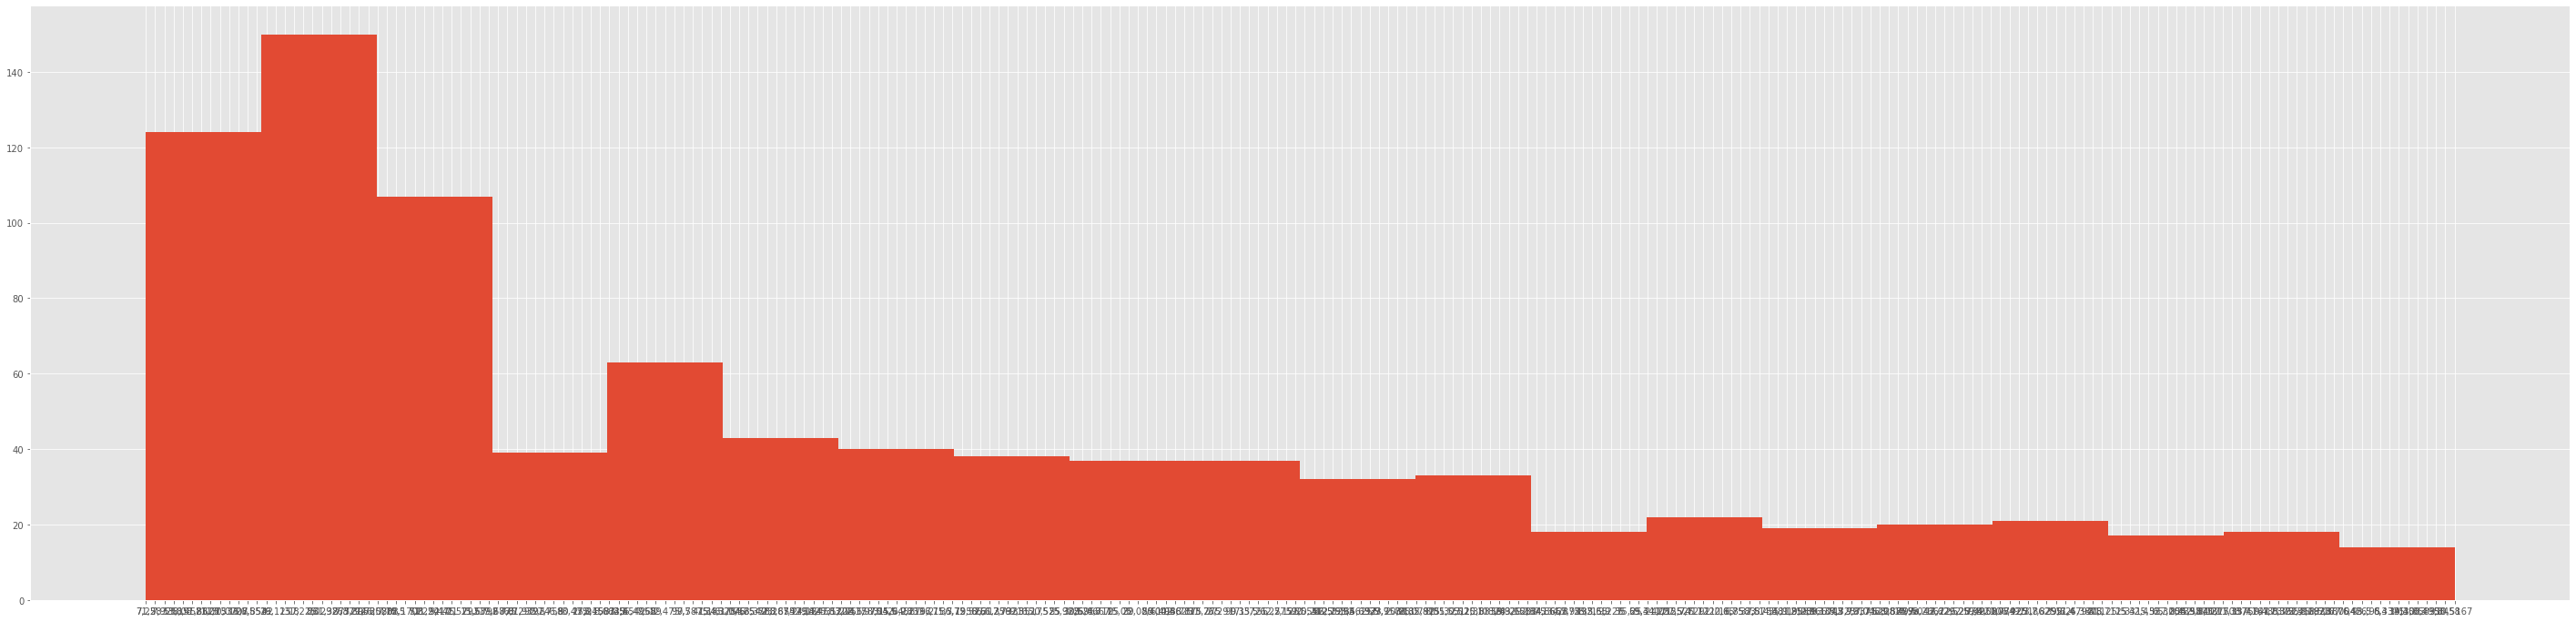

In [22]:
df['Fare'].hist(bins=20) # ujemna cena biletu na pewno nie ma sensu

In [23]:
# przy okazji przekształćmy Fare do postaci numerycznej
df['Fare'] = df['Fare'].str.replace(',','.')
df['Fare'] = df['Fare'].str.replace('[a-z]', '', regex=True)

In [24]:
df['Fare'] = pd.to_numeric(df['Fare'])

In [25]:
df['Fare'].describe()

count    892.000000
mean      32.074186
std       49.869574
min      -90.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      512.329200
Name: Fare, dtype: float64

In [26]:
df['Fare_pos'] = df['Fare']

In [27]:
df.loc[df.Fare_pos <= 0,'Fare_pos'] = np.nan

In [28]:
fare_pos_med=df['Fare_pos'].median()

In [29]:
df['Fare'] = df['Fare_pos'].fillna(fare_pos_med)

In [30]:
df=df.drop(['Fare_pos'], axis=1)

In [31]:
df['Fare'].describe() # przygotowaliśmy kolumnę do analizy i usunęliśmy ujemne wartości

count    892.000000
mean      32.435173
std       49.581709
min        4.012500
25%        7.925000
50%       14.500000
75%       30.771850
max      512.329200
Name: Fare, dtype: float64

In [32]:
df['Cabin'].value_counts(normalize=True, dropna=False) 
# w przypadku kolumny Cabin usuwanie wartości nieokreślonych nie ma sensu ponieważ jest ich zbyt dużo 
# w zbiorze występuje zbyt dużo unikalnych wartości, więc kolumna zostanie w swoim pierwotnym stanie

NaN                0.767937
G6                 0.006726
C93                0.005605
C23 C25 C27        0.004484
B96 B98            0.004484
C22 C26            0.003363
D                  0.003363
F33                0.003363
F2                 0.003363
E101               0.003363
F4                 0.002242
C68                0.002242
D26                0.002242
B77                0.002242
E121               0.002242
D20                0.002242
D17                0.002242
B35                0.002242
D33                0.002242
B58 B60            0.002242
C2                 0.002242
C92                0.002242
E33                0.002242
B18                0.002242
E67                0.002242
B57 B59 B63 B66    0.002242
C124               0.002242
E8                 0.002242
C126               0.002242
E44                0.002242
C65                0.002242
F G73              0.002242
C125               0.002242
B20                0.002242
B22                0.002242
E25                0

In [33]:
df['Sex'].value_counts() # w przypadku tej kolumny mamy wartości wpisane z literówkami

male       576
female     312
mal          1
malef        1
femmale      1
fem          1
Name: Sex, dtype: int64

In [34]:
df['Sex'] = df['Sex'].replace(['fem', 'malef', 'mal', 'femmale'], ['female', 'male', 'male', 'female'])
df['Sex'].value_counts() # kolumna po poprawkach

male      578
female    314
Name: Sex, dtype: int64

In [35]:
df['Survived'].value_counts()

0    547
1    345
Name: Survived, dtype: int64

In [36]:
df['Pclass'].value_counts()

3    491
1    217
2    184
Name: Pclass, dtype: int64

In [37]:
df['PassengerId'].value_counts() # w przypadku tej kolumny mamy problem polegający na zdublowanych id pasażerów

225     3
11      3
295     1
306     1
305     1
304     1
303     1
302     1
301     1
300     1
299     1
298     1
297     1
296     1
294     1
308     1
293     1
292     1
291     1
290     1
289     1
288     1
287     1
286     1
285     1
284     1
283     1
307     1
309     1
281     1
323     1
334     1
333     1
332     1
331     1
330     1
329     1
328     1
327     1
326     1
325     1
324     1
322     1
310     1
321     1
320     1
319     1
318     1
317     1
316     1
315     1
314     1
313     1
312     1
311     1
282     1
1000    1
335     1
239     1
250     1
249     1
248     1
247     1
246     1
245     1
244     1
243     1
242     1
241     1
240     1
238     1
252     1
237     1
236     1
235     1
234     1
233     1
232     1
231     1
230     1
229     1
228     1
227     1
251     1
253     1
279     1
267     1
278     1
277     1
276     1
275     1
274     1
273     1
272     1
271     1
270     1
269     1
268     1
266     1
254     1


In [38]:
df = df[df.PassengerId != 225]

In [39]:
df = df[df.PassengerId != 11]

In [40]:
df['Name'].value_counts() # problemy zniknęły również z kolumny name

Mellinger, Miss. Madeleine Violet                                                     1
Johnston, Miss. Catherine Helen "Carrie"                                              1
Coxon, Mr. Daniel                                                                     1
Sivola, Mr. Antti Wilhelm                                                             1
Moutal, Mr. Rahamin Haim                                                              1
Byles, Rev. Thomas Roussel Davids                                                     1
Smiljanic, Mr. Mile                                                                   1
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")                     1
Astor, Mrs. John Jacob (Madeleine Talmadge Force)                                     1
Sage, Mr. Frederick                                                                   1
Pasic, Mr. Jakob                                                                      1
Hosono, Mr. Masabumi            

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,Titanic
5,6,0,3,"Moran, Mr. James",male,28.00,0,0,330877,8.4583,NaN,Q,Titanic
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,Titanic
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Titanic
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,Titanic
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Titanic


In [42]:
df.to_csv('TitanicCleaned.tsv') # po wyczyszczeniu wykonaliśmy zapis zbioru